In [1]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/winemag-data-130k-v2.csv', index_col=0)
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [3]:
country = df.groupby('country')
country.describe().head()

points                                                 \
                         count       mean       std   min    25%   50%    75%   
country                                                                         
Argentina               3800.0  86.710263  3.179627  80.0  84.00  87.0  89.00   
Armenia                    2.0  87.500000  0.707107  87.0  87.25  87.5  87.75   
Australia               2329.0  88.580507  2.989900  80.0  87.00  89.0  91.00   
Austria                 3345.0  90.101345  2.499799  82.0  88.00  90.0  92.00   
Bosnia and Herzegovina     2.0  86.500000  2.121320  85.0  85.75  86.5  87.25   

                                price                                     \
                          max   count       mean        std   min    25%   
country                                                                    
Argentina                97.0  3756.0  24.510117  23.430122   4.0  12.00   
Armenia                  88.0     2.0  14.500000   0.707107  14.0  14.25   
Australia               100.0  2294.0  35.437663  49.049458   5.0  15.00   
Austria                  98.0  2799.0  30.762772  27.224797   7.0  18.00   
Bosnia and Herzegovina   88.0     2.0  12.500000   0.707107  12.0  12.25   

                                             
                         50%    75%     max  
country                                      
Argentina               17.0  25.00   230.0  
Armenia                 14.5  14.75    15.0  
Australia               21.0  38.00   850.0  
Austria                 25.0  36.50  1100.0  
Bosnia and Herzegovina  12.5  12.75    13.0

In [4]:
country.mean().sort_values(by='points', ascending=False).head()

,points,price
country,,
England,91.581081,51.681159
India,90.222222,13.333333
Austria,90.101345,30.762772
Germany,89.851732,42.257547
Canada,89.369650,35.712598


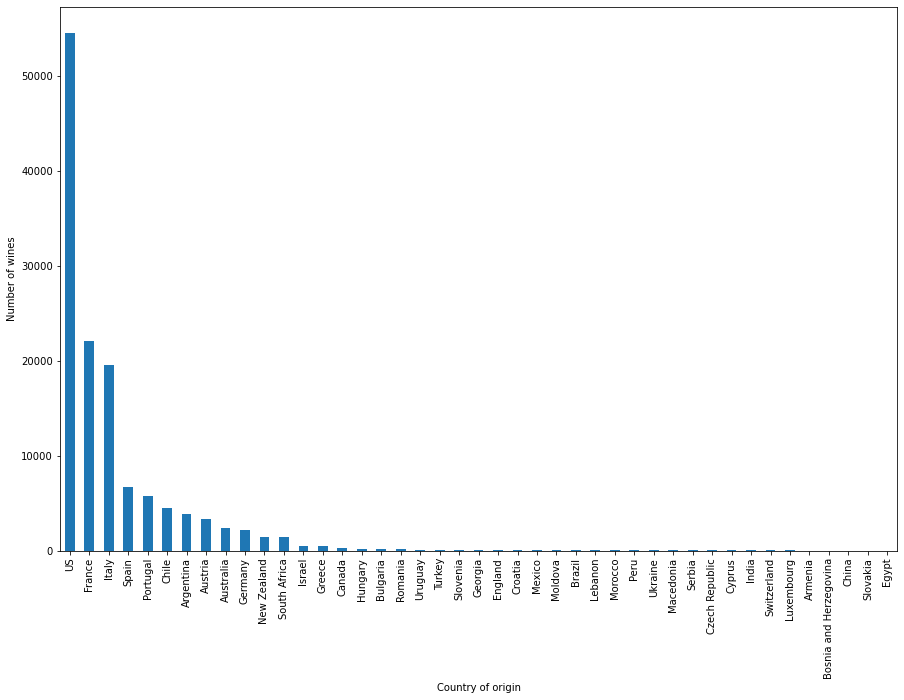

In [5]:
plt.figure(figsize=(15,10))
country.size().sort_values(ascending=False).plot.bar()
plt.xlabel('Country of origin')
plt.ylabel('Number of wines')
plt.show()

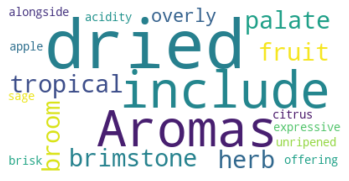

In [6]:
text = df.description[0]
wordcloud = WordCloud(background_color='white', max_words=100).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

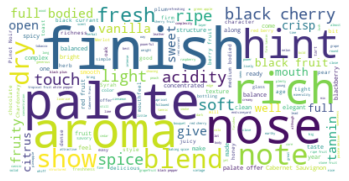

In [7]:
text = " ".join(review for review in df.description)
stopwords = set(STOPWORDS)
stopwords.update(['drink', 'wine', 'now', 'flavor', 'flavors'])
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [8]:
wine_mask = np.array(Image.open('img/wine_mask.png'))
wine_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [9]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val
    

transfomed_wine_mask = np.ndarray((wine_mask.shape[0], wine_mask.shape[1]), np.int32)

for i in range(len(wine_mask)):
    transfomed_wine_mask[i] = list(map(transform_format, wine_mask[i]))
    

transfomed_wine_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

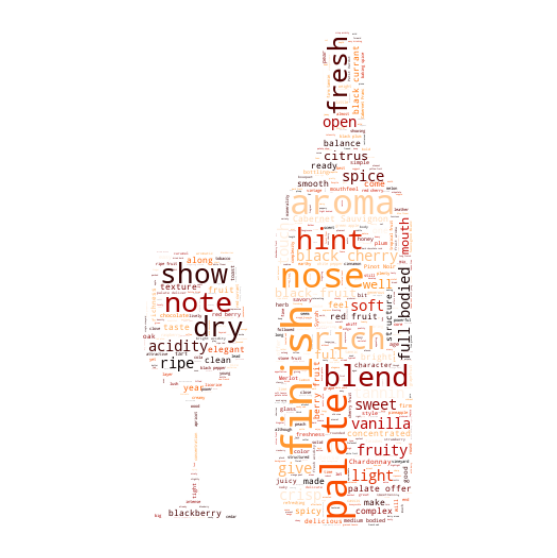

In [10]:
wc = WordCloud(max_words=1000, mask=transfomed_wine_mask, 
               stopwords=stopwords, colormap='gist_heat', 
               random_state=5, max_font_size=40, min_font_size=1, background_color='white')

wc.generate(text)
wc.to_file('output/wine_wordcloud.png')

plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [11]:
country.size().sort_values(ascending=False).head()

country
US          54504
France      22093
Italy       19540
Spain        6645
Portugal     5691
dtype: int64

In [12]:
us = " ".join(review for review in df[df['country']=='US'].description)
france = " ".join(review for review in df[df['country']=='France'].description)
italy = " ".join(review for review in df[df['country']=='Italy'].description)
spain = " ".join(review for review in df[df['country']=='Spain'].description)
portugal = " ".join(review for review in df[df['country']=='Portugal'].description)

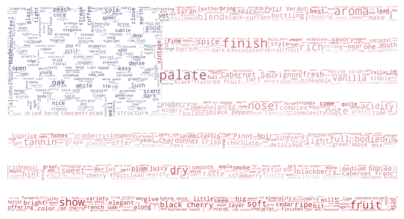

In [13]:
mask = np.array(Image.open('img/us.png'))
wordcloud_us = WordCloud(stopwords=stopwords, background_color='white', mode="RGBA", max_words=1000, mask=mask).generate(us)

image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_us.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
wordcloud_us.to_file('output/us_wordcloud.png')
plt.show()

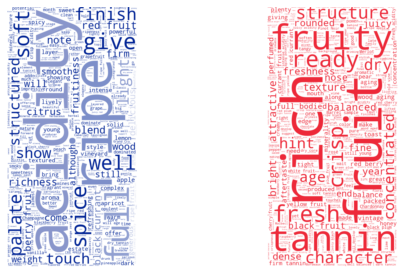

In [14]:
mask = np.array(Image.open('img/france.png'))
wordcloud_france = WordCloud(stopwords=stopwords, background_color='white', mode="RGBA", max_words=1000, mask=mask).generate(france)

image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_france.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
wordcloud_france.to_file('output/france_wordcloud.png')
plt.show()

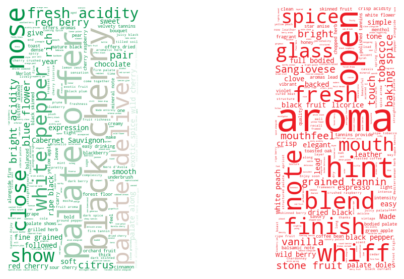

In [15]:
mask = np.array(Image.open('img/italy.png'))
wordcloud_italy = WordCloud(stopwords=stopwords, background_color='white', max_words=1000, mask=mask).generate(italy)

image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_italy.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
wordcloud_italy.to_file('output/italy_wordcloud.png')
plt.show()

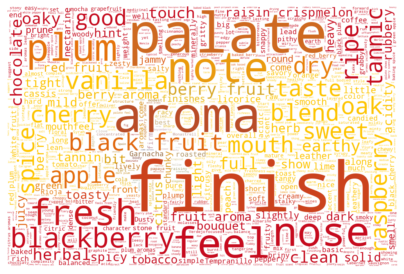

In [16]:
mask = np.array(Image.open('img/spain.png'))
wordcloud_spain = WordCloud(stopwords=stopwords, background_color='white',max_words=1000, mask=mask).generate(spain)

image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_spain.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
wordcloud_spain.to_file('output/spain_wordcloud.png')
plt.show()

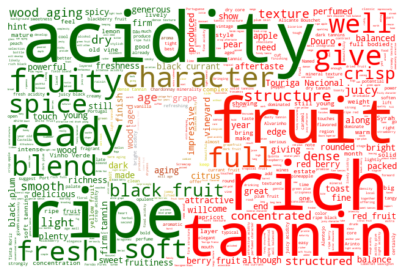

In [17]:
mask = np.array(Image.open('img/portugal.png'))
wordcloud_portugal = WordCloud(stopwords=stopwords, background_color='white',max_words=1000, mask=mask).generate(portugal)

image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_portugal.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
wordcloud_portugal.to_file('output/portugal_wordcloud.png')
plt.show()